## Tasca M7 T01

In [1]:
%matplotlib nbagg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Llegim el dataset, comprovem que no hi ha valors nuls i en veiem la descripció estatística bàsica. El dataset està molt net i en principi es pot utilitzar tal com està sense fer-hi modificacions. 

In [2]:
col_names = ['class','alcohol','malic_acid','ash','alcalinity','magnesium','total_phenols','flavanoids', 
             'nonflavanoid_phenols','proanthocyanins','color_intensity','hue','OD280/OD315','proline']
df = pd.read_csv('wineData.txt', names=col_names)

df.isna().sum()

class                   0
alcohol                 0
malic_acid              0
ash                     0
alcalinity              0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
OD280/OD315             0
proline                 0
dtype: int64

In [3]:
df.describe()

,class,alcohol,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Exercici 1

Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.




Començarem important les llibreries necessàries preperant les dades per separar les *features* i la columna *target* en el nostre cas **class**

In [4]:
from sklearn.model_selection import train_test_split # Per preparar i separar les dades en train i test

from sklearn.tree import DecisionTreeClassifier # Model Decision Tree Classifier

from sklearn import svm # Model svm (Suport Vector Machines)

from sklearn.neighbors import KNeighborsClassifier # Model knn (K nearest neighbors)

from sklearn import metrics #Mètriques del scikit-learn per calcular Accuracy


In [5]:
feature_cols = ['alcohol','malic_acid','ash','alcalinity','magnesium','total_phenols','flavanoids', 
             'nonflavanoid_phenols','proanthocyanins','color_intensity','hue','OD280/OD315','proline']
X = df[feature_cols] # Features
y = df['class'] # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Creem els models:

1. Decision Tree
2. SVM
3. KNN

i els entrenem amb els paràmetres per defecte.

In [6]:
# Creem l'objecte Decision Tree classifer
dt_clf = DecisionTreeClassifier().fit(X_train,y_train)

# Creem l'objecte svm Classifier
svm_clf = svm.SVC(kernel='linear').fit(X_train,y_train) # Linear Kernel

# Creem l'objecte knn
knn_clf = KNeighborsClassifier().fit(X_train,y_train)



### Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

Preparem les prediccions per cada un dels models i en calcularem l'*accuracy*

In [7]:
#Predicció pel Decision Tree
y_pred_dt = dt_clf.predict(X_test)

#Predicció pel SVM
y_pred_svm = svm_clf.predict(X_test)

#Predicció pel knn
y_pred_knn = knn_clf.predict(X_test)


In [8]:
# Calculem l'Accuracy que ens respona a quant el model classifica correctament TP (True Positive)
print("Accuracy dt:",metrics.accuracy_score(y_test, y_pred_dt))
print('')
print("Accuracy svm:",metrics.accuracy_score(y_test, y_pred_svm))
print('')
print("Accuracy knn:",metrics.accuracy_score(y_test, y_pred_knn))

Accuracy dt: 0.9629629629629629

Accuracy svm: 0.9629629629629629

Accuracy knn: 0.7037037037037037


Obtenim un resultats molt bons en els models DT i SVM però no tant en el model knn. Generarem la matriu de confusió i calcularem les mètriques *Precision* i *Recall*.

In [9]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_dt = metrics.confusion_matrix(y_test, y_pred_dt)
cm_svm = metrics.confusion_matrix(y_test, y_pred_svm)
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
print ('Confusion matrix dt')
print (cm_dt)
print ('Confusion matrix svm')
print (cm_svm)
print ('Confusion matrix knn')
print (cm_knn)

Confusion matrix dt
[[22  1  0]
 [ 0 18  1]
 [ 0  0 12]]
Confusion matrix svm
[[23  0  0]
 [ 1 18  0]
 [ 0  1 11]]
Confusion matrix knn
[[21  0  2]
 [ 2 12  5]
 [ 0  7  5]]


La diagonal principal ens indica el número de classificacions fetes correctament per a cada classe. Així, la matriu de confusió del model dt a classificat correctament 23 classe 1 com a classe1, 18 classe 2 com a classe 2 i 12 classe 3 com a classe 3. L'única classificació incorrecte en el dt la trobem a la columna 3 fila 2 la qual indica que s'ha classificat un vi classe 2 com a classe 3. Aquesta matriu de confusió és una mica més complexa ja que les classificacions no són binàries, tenim 3 classes. Per tal d'entendre-ho una mica millor analitzarem més profundament la matriu de confusió del model knn, on hi ha més errors de classificació. Comencem creant un dataFrame amb els valors de la matriu de confusió:

In [10]:
cm_df = pd.DataFrame(cm_knn,
                     index = ['class1','class2','class3'], 
                     columns = ['class1','class2','class3'])
cm_df

,class1,class2,class3
class1,21,0,2
class2,2,12,5
class3,0,7,5


I mostrem el gràfic per tal de facilitar la visualització:

<IPython.core.display.Javascript object>


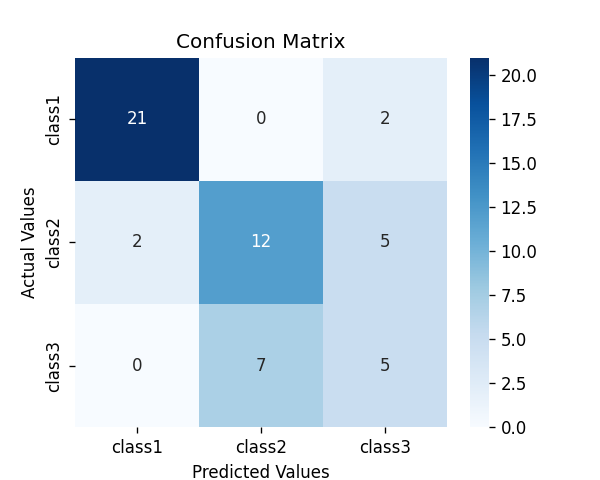

In [11]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Aquí veiem més clarament quant ha estat ben classificat un vi i quant no. Els True Positives (TN) són aquells, com esmentat, de la diagonal principal, o sigui, quant els valors reals són els mateixos que els predits. En aquest cas 21, 12 i 5. Per la resta d'anàlisis True Negatives (TN), False Negative (FN) i False Positives (FP) com que la classificació és múltiple sa de fer per cada una de les classes. Per exemple per la classe 1, el TN són els valors reals que no eren classe 1 i han estat correctament classificats com a no classe 1 (12 + 5 +7 +5). Els FN són aquells han classificats com a classe 2 o 3 però eren classe 1 (fila 1 -> 0 + 2) i els FP els que han estat classificats com a classe 1 però no ho eren (columna 1 -> 2 + 0). L'anàlisis és semblant per a la resta de classes:

In [12]:
TP_1 = 21
FN_1 = 0+2
FP_1 = 2+0
TN_1 = 12+5+7+5

In [13]:
TP_2 = 12
FN_2 = 0+5
FP_2 = 7+0
TN_2 = 21+2+5+0

In [14]:
TP_3 = 5
FN_3 = 0+7
FP_3 = 5+2
TN_3 = 21+0+2+12

Un cop tenim una noció de les matris de confusió, podem calcular les mètriques Precision i Recall:

$Precision = \frac{TP}{TP+FP}$, que respon a:
Quina proporció d'identificacions positives era realment correcta?

$Recall = \frac{TP}{TP+FN}$, que respon a:Quina proporció de positius reals s'ha identificat correctament?

Com que la matriu de confusió no és binària podriem calcular-ho manualment amb els valor mostrats anteriorment o utilitzar les mètriques de scikit-learn amb la variable average la qual aplica diferents mètodes per multi-classificadors:

In [15]:
# Model DT
print("Precision DT:",metrics.precision_score(y_test, y_pred_dt, average='macro'))
print("Recall DT:",metrics.recall_score(y_test, y_pred_dt, average='macro'))
print('')
# Model SVM
print("Precision SVM:",metrics.precision_score(y_test, y_pred_svm, average='macro'))
print("Recall SVM:",metrics.recall_score(y_test, y_pred_svm, average='macro'))
print('')
# Model KNN
print("Precision KNN:",metrics.precision_score(y_test, y_pred_knn, average='macro'))
print("Recall KNN:",metrics.recall_score(y_test, y_pred_knn, average='macro'))
print('')

Precision DT: 0.9568151147098515
Recall DT: 0.9679633867276888

Precision SVM: 0.9685672514619883
Recall SVM: 0.9546783625730993

Precision KNN: 0.653763030765319
Recall KNN: 0.653763030765319



Finalment podem veure el resum d'aquestes mètriques amb el *classification_report* de scikit-learn on veiem le mètriques precision i recall per cada classe, utilitzant l'*average* amb el mètode *macro* i *weigthed*  i l'*accuracy* calculada anteriorment.

In [16]:
from sklearn.metrics import classification_report
target_names = ['class1', 'class2', 'class3']
print('Model DT')
print(classification_report(y_test, y_pred_dt, target_names=target_names))
print('')

print('Model SVM')
print(classification_report(y_test, y_pred_svm, target_names=target_names))
print('')

print('Model KNN')
print(classification_report(y_test, y_pred_knn, target_names=target_names))
print('')

Model DT
              precision    recall  f1-score   support

      class1       1.00      0.96      0.98        23
      class2       0.95      0.95      0.95        19
      class3       0.92      1.00      0.96        12

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54


Model SVM
              precision    recall  f1-score   support

      class1       0.96      1.00      0.98        23
      class2       0.95      0.95      0.95        19
      class3       1.00      0.92      0.96        12

    accuracy                           0.96        54
   macro avg       0.97      0.95      0.96        54
weighted avg       0.96      0.96      0.96        54


Model KNN
              precision    recall  f1-score   support

      class1       0.91      0.91      0.91        23
      class2       0.63      0.63      0.63        19
      class3       0.42      0.42      0.42 

### Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

Considerant que els models DT i SVM han donat un molt bon resultat, aplicarem diferents paràmetres al KNN que ha estat, de llarg el que pitjor ha predit la classificació dels vins.

Un dels valors més importants pel model knn és el número de veins utilitzat, per defecte és n_neighbor = 5. Farem un anàlisis gràfic ràpid amb el MAE i l'Accuracy per n_neighbor de variant de 1 a 40. Volem minimitzar el MAE i maximitzar l'Accuracy.

<IPython.core.display.Javascript object>


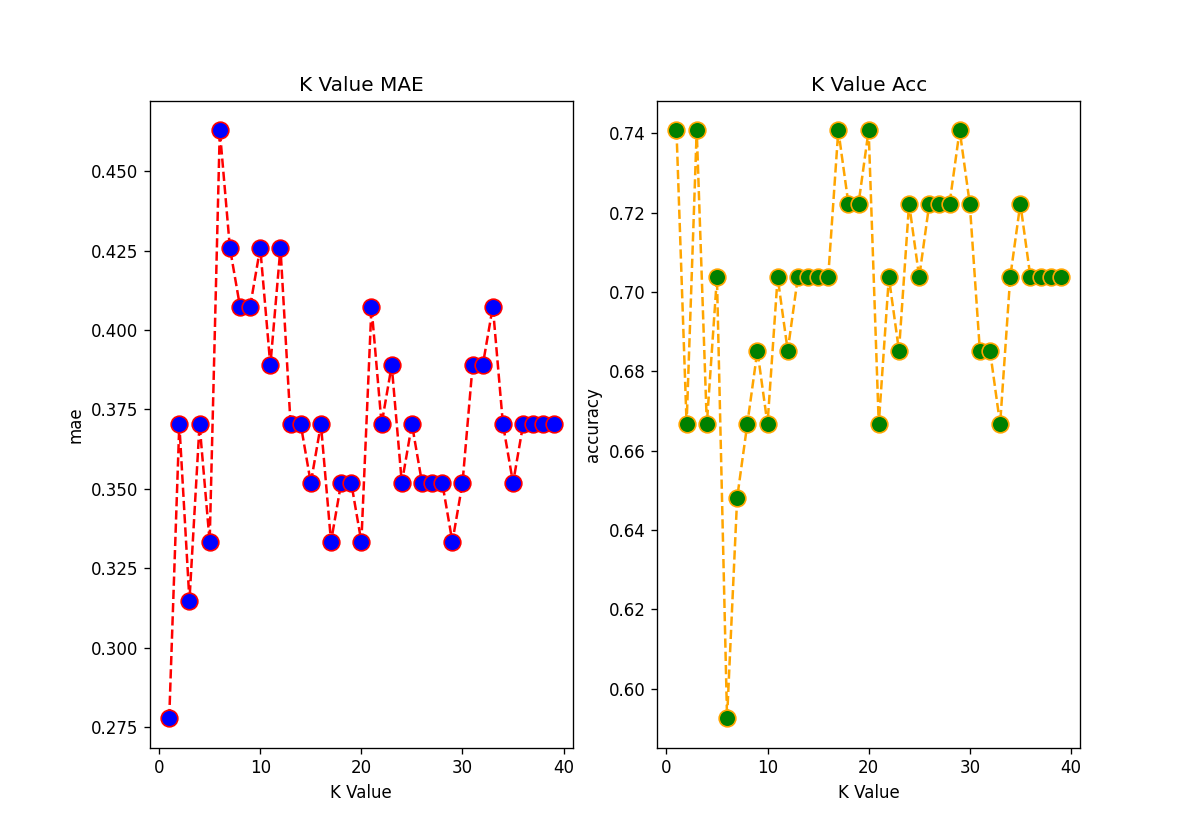

Text(0, 0.5, 'accuracy')

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)
    
accuracy = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, pred_i)
    accuracy.append(acc)
    

    
fig, ax = plt.subplots(1,2,figsize=(10, 7))
ax[0].plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
ax[1].plot(range(1, 40), accuracy, color='orange', linestyle='dashed', marker='o',markerfacecolor='green', markersize=10)
         
ax[0].set_title('K Value MAE')
ax[0].set_xlabel('K Value')
ax[0].set_ylabel('mae')

ax[1].set_title('K Value Acc')
ax[1].set_xlabel('K Value')
ax[1].set_ylabel('accuracy')

El número n_neighbor que maximitza l'Accuracy i minimitza el MAE és 1. El qual ens dona un accuracy del 0.74, més alta que la obtinguda anteriorment que era de 0.70.

In [18]:
# Creem l'objecte knn
knn_clf = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
#Predicció pel knn
y_pred_knn = knn_clf.predict(X_test)
print("Accuracy knn:",metrics.accuracy_score(y_test, y_pred_knn))

cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
print ('Confusion matrix knn')
print (cm_knn)

print('Model KNN')
print(classification_report(y_test, y_pred_knn, target_names=target_names))
print('')

Accuracy knn: 0.7407407407407407
Confusion matrix knn
[[21  1  1]
 [ 1 14  4]
 [ 0  7  5]]
Model KNN
              precision    recall  f1-score   support

      class1       0.95      0.91      0.93        23
      class2       0.64      0.74      0.68        19
      class3       0.50      0.42      0.45        12

    accuracy                           0.74        54
   macro avg       0.70      0.69      0.69        54
weighted avg       0.74      0.74      0.74        54




### Exercici 4

Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

Utilitzarem més parametres i el cross validation amb el GridSearchCV per veure si el model millora:


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid_clf = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],  
              'weights': ["uniform", "distance"], 
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [30,40,50, 100],
              'p': [1,2]}  

grid = GridSearchCV(
    estimator=knn_clf,
    param_grid=param_grid_clf,
    cv=10,
    n_jobs=5,
    verbose=1
)

#Entrenem el model amb el grid

grid.fit(X_train, y_train)

Fitting 10 folds for each of 640 candidates, totalling 6400 fits


/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=1), n_jobs=5,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50, 100],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=1)

In [22]:
# Els millor parametres pel knn són:
print(grid.best_params_)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [23]:
#Predicció pel knn
y_pred_grid = grid.predict(X_test)
print("Accuracy grid:",metrics.accuracy_score(y_test, y_pred_grid))

cm_grid = metrics.confusion_matrix(y_test, y_pred_grid)
print ('Confusion matrix knn')
print (cm_grid)

print('Model KNN')
print(classification_report(y_test, y_pred_grid, target_names=target_names))
print('')

Accuracy grid: 0.7962962962962963
Confusion matrix knn
[[21  1  1]
 [ 1 15  3]
 [ 0  5  7]]
Model KNN
              precision    recall  f1-score   support

      class1       0.95      0.91      0.93        23
      class2       0.71      0.79      0.75        19
      class3       0.64      0.58      0.61        12

    accuracy                           0.80        54
   macro avg       0.77      0.76      0.76        54
weighted avg       0.80      0.80      0.80        54




Hem aconseguit millorar el resultat lleugerament, obtenint una *accuracy* del 0.79. També s'ha millorat els TP de la classe 3 que eren els que donàven un pitjor resultat, com podem veure en l'evolució del paràmetre precision de la classe 3 (0.42, 0.50, 0.64) en les diferents modificacions fetes. Tot i així encara està lluny dels altres models adoptats.

### Exercici 5

Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

Finalment, aplicarem una standarització de les dades per verificar sí obtenim una millora amb paràmetres que ens han donat millor resultat:

In [24]:
feature_cols = ['alcohol','malic_acid','ash','alcalinity','magnesium','total_phenols','flavanoids', 
             'nonflavanoid_phenols','proanthocyanins','color_intensity','hue','OD280/OD315','proline']
X = df[feature_cols] # Features
y = df['class'] # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [25]:
from sklearn.preprocessing import StandardScaler

trans = StandardScaler()

X_train_sc = trans.fit_transform(X_train)
X_test_sc = trans.fit_transform(X_test)

In [27]:
# Creem l'objecte knn
knn_clf = KNeighborsClassifier(n_neighbors=1,p=1).fit(X_train_sc,y_train)
#Predicció pel knn
y_pred_knn = knn_clf.predict(X_test_sc)
print("Accuracy knn:",metrics.accuracy_score(y_test, y_pred_knn))

cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
print ('Confusion matrix knn')
print (cm_knn)

print('Model KNN')
print(classification_report(y_test, y_pred_knn, target_names=target_names))
print('')

Accuracy knn: 0.9629629629629629
Confusion matrix knn
[[23  0  0]
 [ 1 17  1]
 [ 0  0 12]]
Model KNN
              precision    recall  f1-score   support

      class1       0.96      1.00      0.98        23
      class2       1.00      0.89      0.94        19
      class3       0.92      1.00      0.96        12

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54




Amb l'estandarització de les dades hem aconseguit posar el model knn al nivell dels anteriors models (dt i svm) amb els quals havíem obtingut resultats per sobre del 0.95. Aquest últim model knn coregeix les prediccions per la classe 3 que eren les que més fallàven.

Com a complement, mostrem la figura de l'arbre de decisió utilitzada en el model DT.

<IPython.core.display.Javascript object>


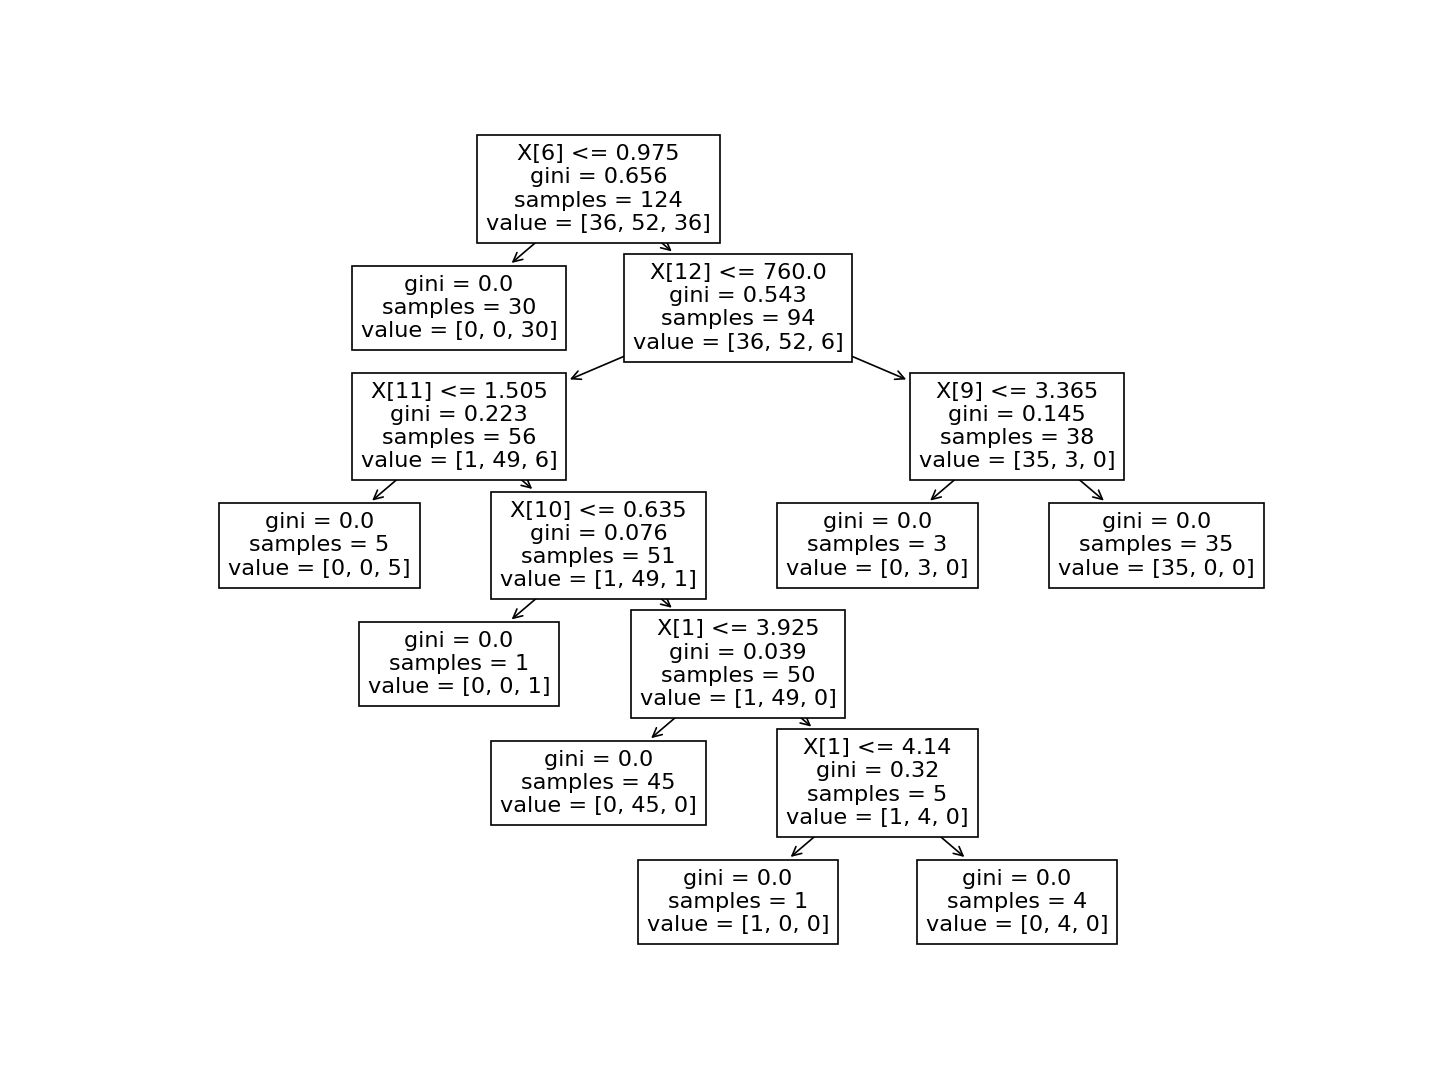

In [29]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(12,9))
plot_tree(dt_clf)
plt.show()